## Soft Cosine Similarities

How does each compound compare itself with the ISO-106 in full space and subspaces? Plot discuss.

Cosine similarity doesn't care about scalers, so the quantities of these chemical features will not effect the way it distinguishes. Cosine similarity only cares about direction. How far is the angle between these two vectors? Does there happen to be a single dimension we wish to capture with these data, if so, how do each of these data stand up when projected onto the OMS-S-106 vector in light of the dimensions interesting. This could give contributions only in the direction that matters. (Think football field, passing laterally is unimportant, but toward the goal is priceless. How many yards did each pass (observation) project in the "toward the goal" direction? Map it onto a vector you know pointed that direction, and see how everyone sizes up.)



## Analysis

1. Calculate Cosine Similarities on all features except IC50
2. Calculate % IC50 ratios on all compounds.
3. Use heatmaps to illustrate similarities.

## Load Libraries

In [1]:
# Core
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import os
import subprocess
from __future__ import division
import pickle
from collections import defaultdict

def install_package(name):
    sudoPassword = ''
    command = 'pip install ' + name
    p = os.system('echo %s|sudo -S %s' % (sudoPassword, command))

# Stats
from statsmodels.regression import linear_model
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Splitting
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Verification
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Distance | Similarity
from scipy import spatial
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

# OR
from skcriteria import Data, MIN, MAX
from skcriteria.madm import closeness, simple

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from ggplot import *


/Library/Python/2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load data

In [2]:
# Data Feed
# Read in main data
main_df = pd.read_csv("../../data/Series3_6.15.17_padel.csv")

# Read in placebos data
#placebo_1 = pd.read_csv("../../data/Akt1_decoys_padel.csv")
#placebo_2 = pd.read_csv("../../data/AmpC_decoys_padel.csv")
#placebo_3 = pd.read_csv("../../data/cp3a4_decoys_padel.csv")
#placebo_4 = pd.read_csv("../../data/cxcr4_decoys_padel.csv")
#placebo_5 = pd.read_csv("../../data/HIVpr_decoys_padel.csv")
#placebo_6 = pd.read_csv("../../data/HIVrt_decoys_padel.csv")
#placebo_7 = pd.read_csv("../../data/Kif11_decoys_padel.csv")
placebo_8 = pd.read_csv("../../data/Selleck_filtered_padel_corrected.csv")
#placebo_1.insert(1, "IC50", pd.Series(np.array([250 for i in range(placebo_1.shape[0])], dtype="float64"))) 
#placebo_2.insert(1, "IC50", pd.Series(np.array([250 for i in range(placebo_2.shape[0])], dtype="float64"))) 
#placebo_3.insert(1, "IC50", pd.Series(np.array([250 for i in range(placebo_3.shape[0])], dtype="float64"))) 
#placebo_4.insert(1, "IC50", pd.Series(np.array([250 for i in range(placebo_4.shape[0])], dtype="float64"))) 
#placebo_5.insert(1, "IC50", pd.Series(np.array([250 for i in range(placebo_5.shape[0])], dtype="float64"))) 
#placebo_6.insert(1, "IC50", pd.Series(np.array([250 for i in range(placebo_6.shape[0])], dtype="float64"))) 
#placebo_7.insert(1, "IC50", pd.Series(np.array([250 for i in range(placebo_7.shape[0])], dtype="float64"))) 
placebo_8.insert(1, "IC50", pd.Series(np.array([250 for i in range(placebo_8.shape[0])], dtype="float64"))) 


# Gather our dataframes for collective manipulation
frames = [main_df,   placebo_8]
len(frames)

# Scrub-a-dub that nasty
row_mask=frames[0].isnull().any(axis=1) == False
frames[0] = frames[0].loc[row_mask,:]


frames[0].shape


/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (69,123,664,1142,1143,1146,1147,1184,1185,1186,1225,1226,1227,1228,1229,1230,1249,1412) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(46, 1446)

## Cosine Similarities | Potency Similarity Ratio

In [3]:
nrow,ncol=frames[0].shape
A = defaultdict(list)

# Note: Cosine Similarity is between 0 and 1. No similarity or perfect similarity.
for i in range(nrow):
    cos_list=[]
    ratio_list=[]
    for j in range(nrow):
        cos_sim = 1 - spatial.distance.cosine(frames[0].iloc[i,2:],
                                                frames[0].iloc[j,2:])
        ic50_sim_ratio = 1 - abs(frames[0].iloc[i,1]-frames[0].iloc[j,1])/sum([frames[0].iloc[i,1],frames[0].iloc[j,1]])
        
        cos_list.append(cos_sim)
        ratio_list.append(ic50_sim_ratio)
        
    A["cosine_sim"].append(cos_list)
    A["ic50_sim_ratio"].append(ratio_list)


# Confirm Results

In [4]:
A["cosine_sim"][:10]


[[1.0,
  0.97757327962538687,
  0.97502799920371785,
  0.87034293903566851,
  0.95479694499120493,
  0.75008393345844826,
  0.99194452915254927,
  0.98976085801904812,
  0.98888872262599647,
  0.95889371967630743,
  0.98964664376670231,
  0.99167512898531496,
  0.98041246032204898,
  0.99338090440953708,
  0.99235931349637874,
  0.99434561577229119,
  0.99147874396974656,
  0.99110037273412299,
  0.9861522493617455,
  0.99798490355256975,
  0.98253483984030687,
  0.97928067580939737,
  0.79832943779453336,
  0.85115828068475186,
  0.92646482791082385,
  0.98305804816014086,
  0.99658925840815138,
  0.99423114574100124,
  0.6169262659287118,
  0.82379918399640073,
  0.86386584468962213,
  0.99136638831275492,
  0.98895997153406268,
  0.98189758324178855,
  0.98826234876697328,
  0.97431923633758566,
  0.98004596808182765,
  0.99228168554858265,
  0.98942536587085717,
  0.98662050584066097,
  0.99499485278961641,
  0.9894354507619505,
  0.99610836343478293,
  0.98396064080317025,
  0.994

In [5]:
# Fact check to make sure this thing is working right
x = 1 - spatial.distance.cosine(frames[0].iloc[0,2:],
                                frames[0].iloc[1,2:])
y = 1 - spatial.distance.cosine(frames[0].iloc[0,2:],
                                frames[0].iloc[2,2:])

print(x)
print(y)

# Then check if it is symetric.

# Passed both tests.


0.977573279625
0.975027999204


In [6]:
A["ic50_sim_ratio"][:10]


[[1.0,
  0.0071741729772817342,
  0.0014389639459589931,
  0.0014389639459589931,
  0.0014389639459589931,
  0.0089596814335489716,
  0.0014389639459589931,
  0.0014389639459589931,
  0.0020550291129125542,
  0.0014389639459589931,
  0.0015987210231814819,
  0.0015987210231814819,
  0.001798381456689091,
  0.0014389639459589931,
  0.0014389639459589931,
  0.0014389639459589931,
  0.0014389639459589931,
  0.0028758587633808119,
  0.0014389639459589931,
  0.0014389639459589931,
  0.0047885075818036027,
  0.041474654377880227,
  0.0071741729772817342,
  0.0071741729772817342,
  0.0071741729772817342,
  0.035363457760314354,
  0.0071741729772817342,
  0.0071741729772817342,
  0.0014389639459589931,
  0.007630351844001626,
  0.0014389639459589931,
  0.00071974089327841995,
  0.0040825584032662121,
  0.00071974089327841995,
  0.00071974089327841995,
  0.00071974089327841995,
  0.00071974089327841995,
  0.00071974089327841995,
  0.0028758587633808119,
  0.0014389639459589931,
  0.001438963945

In [7]:
# Fact check to make sure this thing is working right
x=frames[0].iloc[0,1]
y=frames[0].iloc[2,1]
print(x)
print(y)
print(1 - abs(x-y)/sum([x,y]))

# Then check if it is symetric.

# Passed both tests.


0.036
50.0
0.00143896394596


# Generate Similarity Matrices
## Cosine Similarities | IC50 Similarity Ratio |  Potency-Features Interaction Similarity

In [8]:
cosine_similarity_matrix = pd.DataFrame(np.matrix(A["cosine_sim"]), columns=frames[0].Name.tolist(), index=frames[0].Name.tolist())
ic50_sim_ratio_matrix = pd.DataFrame(np.matrix(A["ic50_sim_ratio"]), columns=frames[0].Name.tolist(), index=frames[0].Name.tolist())
interaction_matrix = cosine_similarity_matrix * ic50_sim_ratio_matrix
overall_sim_matrix = 1 - abs(cosine_similarity_matrix - ic50_sim_ratio_matrix)/(cosine_similarity_matrix + ic50_sim_ratio_matrix)


In [13]:
cosine_similarity_matrix

,OSM-S-106,OSM-S-107,OSM-S-118,OSM-S-119,OSM-S-120,OSM-S-121,OSM-S-122,OSM-S-123,OSM-S-124,OSM-S-125,...,OSM-S-78,OSM-S-79,OSM-S-80,TF16-1,TF17-1,TF18-1,TF3-1,TF4-1,TF7-1,TF8-1
OSM-S-106,1.000000,0.977573,0.975028,0.870343,0.954797,0.750084,0.991945,0.989761,0.988889,0.958894,...,0.980046,0.992282,0.989425,0.986621,0.994995,0.989435,0.996108,0.983961,0.994582,0.987395
OSM-S-107,0.977573,1.000000,0.955701,0.804027,0.908135,0.651865,0.981670,0.968363,0.993761,0.933788,...,0.980671,0.984600,0.988516,0.991978,0.991092,0.992171,0.985362,0.993015,0.987070,0.992196
OSM-S-118,0.975028,0.955701,1.000000,0.862354,0.959136,0.777473,0.973175,0.991722,0.961622,0.960042,...,0.927976,0.958559,0.947588,0.946743,0.964232,0.953780,0.965884,0.948494,0.960355,0.947967
OSM-S-119,0.870343,0.804027,0.862354,1.000000,0.949114,0.885077,0.845605,0.863995,0.829170,0.935264,...,0.810398,0.844309,0.829650,0.822662,0.845137,0.830988,0.856154,0.824839,0.851590,0.828734
OSM-S-120,0.954797,0.908135,0.959136,0.949114,1.000000,0.881294,0.938482,0.954394,0.924046,0.991081,...,0.900767,0.932703,0.918594,0.913686,0.935261,0.923180,0.941157,0.915796,0.937422,0.918597
OSM-S-121,0.750084,0.651865,0.777473,0.885077,0.881294,1.000000,0.703778,0.768511,0.673321,0.843820,...,0.648325,0.712718,0.670764,0.668277,0.705790,0.684688,0.712763,0.660149,0.700968,0.667772
OSM-S-122,0.991945,0.981670,0.973175,0.845605,0.938482,0.703778,1.000000,0.984963,0.993456,0.942804,...,0.984299,0.988461,0.990678,0.987126,0.990939,0.987370,0.992363,0.984392,0.993906,0.988635
OSM-S-123,0.989761,0.968363,0.991722,0.863995,0.954394,0.768511,0.984963,1.000000,0.977120,0.956430,...,0.956885,0.978410,0.969281,0.969533,0.981738,0.973806,0.981856,0.965987,0.977176,0.968661
OSM-S-124,0.988889,0.993761,0.961622,0.829170,0.924046,0.673321,0.993456,0.977120,1.000000,0.941299,...,0.989022,0.991835,0.996254,0.994731,0.995827,0.994652,0.994074,0.993896,0.996008,0.996566
OSM-S-125,0.958894,0.933788,0.960042,0.935264,0.991081,0.843820,0.942804,0.956430,0.941299,1.000000,...,0.912989,0.943154,0.932548,0.930837,0.948815,0.939289,0.950338,0.935369,0.948702,0.936856


In [20]:
ic50_sim_ratio_matrix

,OSM-S-106,OSM-S-107,OSM-S-118,OSM-S-119,OSM-S-120,OSM-S-121,OSM-S-122,OSM-S-123,OSM-S-124,OSM-S-125,...,OSM-S-78,OSM-S-79,OSM-S-80,TF16-1,TF17-1,TF18-1,TF3-1,TF4-1,TF7-1,TF8-1
OSM-S-106,1.000000,0.007174,0.001439,0.001439,0.001439,0.008960,0.001439,0.001439,0.002055,0.001439,...,0.000720,0.000720,0.002876,0.001439,0.001439,0.001439,0.001439,0.001439,0.001439,0.003884
OSM-S-107,0.007174,1.000000,0.333333,0.333333,0.333333,0.888889,0.333333,0.333333,0.444444,0.333333,...,0.181818,0.181818,0.571429,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.701754
OSM-S-118,0.001439,0.333333,1.000000,1.000000,1.000000,0.275862,1.000000,1.000000,0.823529,1.000000,...,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.540146
OSM-S-119,0.001439,0.333333,1.000000,1.000000,1.000000,0.275862,1.000000,1.000000,0.823529,1.000000,...,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.540146
OSM-S-120,0.001439,0.333333,1.000000,1.000000,1.000000,0.275862,1.000000,1.000000,0.823529,1.000000,...,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.540146
OSM-S-121,0.008960,0.888889,0.275862,0.275862,0.275862,1.000000,0.275862,0.275862,0.372093,0.275862,...,0.148148,0.148148,0.484848,0.275862,0.275862,0.275862,0.275862,0.275862,0.275862,0.603774
OSM-S-122,0.001439,0.333333,1.000000,1.000000,1.000000,0.275862,1.000000,1.000000,0.823529,1.000000,...,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.540146
OSM-S-123,0.001439,0.333333,1.000000,1.000000,1.000000,0.275862,1.000000,1.000000,0.823529,1.000000,...,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.540146
OSM-S-124,0.002055,0.444444,0.823529,0.823529,0.823529,0.372093,0.823529,0.823529,1.000000,0.823529,...,0.518519,0.518519,0.833333,0.823529,0.823529,0.823529,0.823529,0.823529,0.823529,0.691589
OSM-S-125,0.001439,0.333333,1.000000,1.000000,1.000000,0.275862,1.000000,1.000000,0.823529,1.000000,...,0.666667,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.540146


In [17]:
overall_sim_matrix

,OSM-S-106,OSM-S-107,OSM-S-118,OSM-S-119,OSM-S-120,OSM-S-121,OSM-S-122,OSM-S-123,OSM-S-124,OSM-S-125,...,OSM-S-78,OSM-S-79,OSM-S-80,TF16-1,TF17-1,TF18-1,TF3-1,TF4-1,TF7-1,TF8-1
OSM-S-106,1.000000,0.014571,0.002947,0.003301,0.003010,0.023608,0.002897,0.002903,0.004148,0.002997,...,0.001468,0.001450,0.005796,0.002913,0.002888,0.002904,0.002885,0.002921,0.002889,0.007837
OSM-S-107,0.014571,1.000000,0.517183,0.586153,0.536999,0.846164,0.506970,0.512152,0.618054,0.526127,...,0.312808,0.311755,0.732627,0.503026,0.503363,0.502953,0.505550,0.502633,0.504896,0.828542
OSM-S-118,0.002947,0.517183,1.000000,0.926090,0.979142,0.523788,0.986405,0.995844,0.922644,0.979614,...,0.836133,0.820399,0.825974,0.972643,0.981790,0.976343,0.982646,0.973566,0.979776,0.725947
OSM-S-119,0.003301,0.586153,0.926090,1.000000,0.973893,0.475240,0.916345,0.927036,0.996587,0.966549,...,0.902691,0.882432,0.891077,0.902704,0.916070,0.907694,0.922503,0.904013,0.919847,0.789180
OSM-S-120,0.003010,0.536999,0.979142,0.973893,1.000000,0.476793,0.968265,0.976665,0.942482,0.995521,...,0.850647,0.833662,0.841081,0.954896,0.966548,0.960056,0.969687,0.956048,0.967700,0.740564
OSM-S-121,0.023608,0.846164,0.523788,0.475240,0.476793,1.000000,0.563190,0.528283,0.711858,0.492751,...,0.372011,0.344184,0.839120,0.584368,0.562036,0.574384,0.558072,0.589442,0.564811,0.949669
OSM-S-122,0.002897,0.506970,0.986405,0.916345,0.968265,0.563190,1.000000,0.992424,0.906479,0.970560,...,0.807608,0.805577,0.804500,0.993521,0.995449,0.993645,0.996167,0.992135,0.996944,0.706636
OSM-S-123,0.002903,0.512152,0.995844,0.927036,0.976665,0.528283,0.992424,1.000000,0.914702,0.977730,...,0.821245,0.810499,0.815022,0.984531,0.990785,0.986729,0.990845,0.982699,0.988456,0.715991
OSM-S-124,0.004148,0.618054,0.922644,0.996587,0.942482,0.711858,0.906479,0.914702,1.000000,0.933269,...,0.687900,0.686619,0.910952,0.905843,0.905298,0.905883,0.906171,0.906259,0.905207,0.819343
OSM-S-125,0.002997,0.526127,0.979614,0.966549,0.995521,0.492751,0.970560,0.977730,0.933269,1.000000,...,0.844066,0.828250,0.833743,0.964180,0.973735,0.968694,0.974537,0.966605,0.973676,0.731408


# Heatmap | Cosine Similarity 

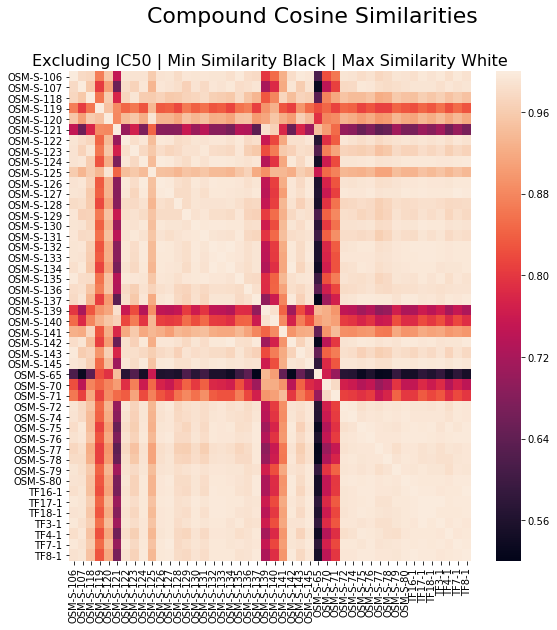

In [9]:
fig, ax = plt.subplots(figsize=(9,9))

sns.heatmap(cosine_similarity_matrix,
            xticklabels=cosine_similarity_matrix.index.tolist(),
            yticklabels=cosine_similarity_matrix.index.tolist())
#ax.xaxis.tick_top()
plt.xticks(rotation=90)
#ax.set_ylabel(cosine_similarity_matrix.index.tolist(), fontsize=18)
#ax.set_xlabel(cosine_similarity_matrix.index.tolist(), fontsize=18)
plt.suptitle("Compound Cosine Similarities", size=22)
ax.set_title("Excluding IC50 | Min Similarity Black | Max Similarity White", size=16)
plt.show()

# Remarks

1. As expected, we see perfect similarity accross the main diagonal.
2. It is interesting that we see mostly similar chemical features accross OSM-S-106, with some exceptions.
3. We can quickly identify segments that group uniquely different chemical composition makeups. Say, OSM-S-142 accross OSM-S-65,70,and 71. Could this be due to lack of IC50 similarity? 

# Heatmap | Potency Similarity Ratio

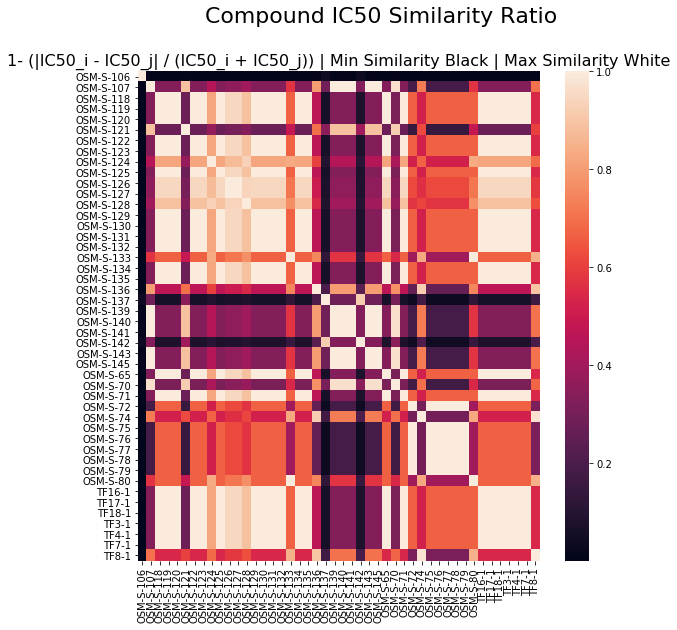

In [22]:
fig, ax = plt.subplots(figsize=(9,9))

sns.heatmap(ic50_sim_ratio_matrix,
            xticklabels=ic50_sim_ratio_matrix.index.tolist(),
            yticklabels=ic50_sim_ratio_matrix.index.tolist())
#ax.xaxis.tick_top()
plt.xticks(rotation=90)
#ax.set_ylabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
#ax.set_xlabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
plt.suptitle("Compound IC50 Similarity Ratio", size=22)
ax.set_title("1- (|IC50_i - IC50_j| / (IC50_i + IC50_j)) | Min Similarity Black | Max Similarity White", size=16)
plt.show()


# Remarks

1. As expected, we see perfect similarity accross the main diagonal.
2. As expected, we see a very small similarity in IC50 accross OSM-S-106 due to its very potent nature leaving non significant potencies when measured up against it.
3. We can quickly identify segments that lend themself to very different IC50 similarity. Say, OSM-S-142 accross OSM-S-75 to OSM-S-79. Could this be due to chemical feature makeup? 

Note: Purple/black show us IC50 similarity percentages that are very low. Could these be because of chemical feature differences?

# Heatmap | Potency-Feature Interaction Similarity
## Cosine Similarity * Potency Similarity Ratio

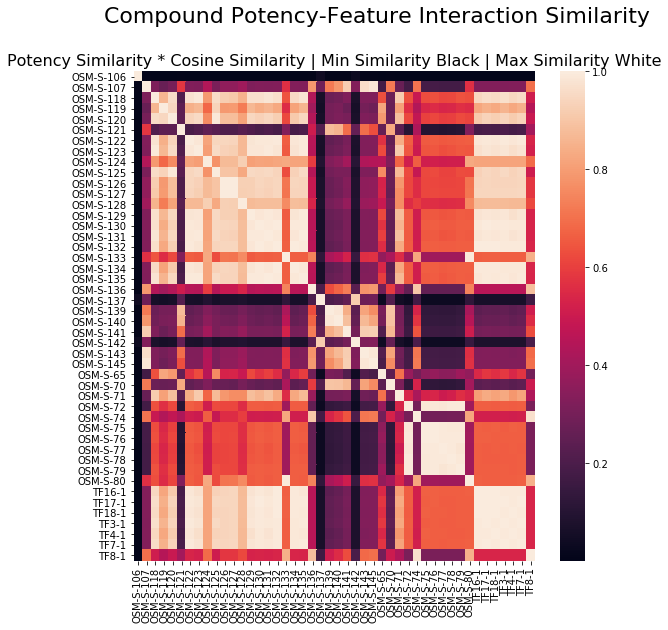

In [11]:
fig, ax = plt.subplots(figsize=(9,9))

sns.heatmap(interaction_matrix,
            xticklabels=interaction_matrix.index.tolist(),
            yticklabels=interaction_matrix.index.tolist())
#ax.xaxis.tick_top()
plt.xticks(rotation=90)
#ax.set_ylabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
#ax.set_xlabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
plt.suptitle("Compound Potency-Feature Interaction Similarity", size=22)
ax.set_title("Potency Similarity * Cosine Similarity | Min Similarity Black | Max Similarity White", size=16)
plt.show()

# Remarks

1. We would expect to see (high Potency Similarity Ratio AND high Cosine Similarity Ratio) to occur as white (high) heats.
    - These are the cases we know make sense. A similar ratio of potency would be related to a similar ratio of cosine similarity
2. We would expect to see a (low Potency Similarity Ratio and low Cosine Similarity Ratio) to occur as black (low) heats.
    - These are the cases we know make sense. A non-similar ratio of potency would be related to a non-similar ratio of cosine similarity.
3. We would expect to see a (low Potency Similarity Ratio and a high Cosine Similarity Ratio) OR (high Potency Similarity Ratio and a low Cosine Similarity Ratio) to result in proportionally Joint Similarity Interaction, displaying the percentage of both being similar (Similar to multiplying probabilities).
    - These are the cases we would not intuitively be apparent. If we have a 1% potency similarity and a 90% cosine similarity, the Joint Similarity Interaction would be 0.01 * 0.90 = 0.09 = 9%. This is very low, hence one or both of the two terms must have been sufficiently low to cause this. This makes it difficult to distinguish between whether it was 1 low agent causing a intuitive interaction (see 2) or if it was one and the another that wasn't bad. But it would be MUCH worse if they were both bad, than a bad and a good.
   
Hence, giving us a measure to see which similarities are WHITE or BLACK showing us expected interaction (similar and similar or non-simialr and non-simiarl). In constract, those with some heat in between would constitute a chemical composition that is not very similar and a potency that is somewhat similar, or vice-versa (a chemical composition that is very similar and a potency that is non-similar). 

# Heatmap | Overall Percent Similarity
#### 1 - (|(Cosine Similarity - Potency Similarity Ratio|) /  (Cosine Similarity + Potency Similarity Ratio))

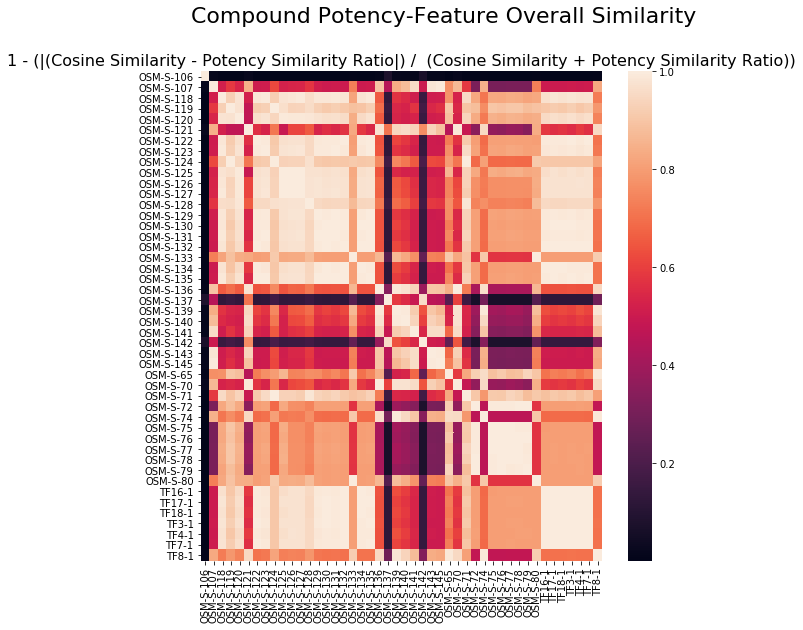

In [24]:
fig, ax = plt.subplots(figsize=(9,9))

sns.heatmap(overall_sim_matrix,
            xticklabels=overall_sim_matrix.index.tolist(),
            yticklabels=overall_sim_matrix.index.tolist())
#ax.xaxis.tick_top()
plt.xticks(rotation=90)
#ax.set_ylabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
#ax.set_xlabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
plt.suptitle("Compound Potency-Feature Overall Similarity", size=22)
ax.set_title("1 - (|(Cosine Similarity - Potency Similarity Ratio|) /  (Cosine Similarity + Potency Similarity Ratio))", size=16)
plt.show()

# Remarks

1. As expected, we see our OSM-S-106 is behaving wildly different than the others.
2. If both of the similarities being measured are close, we will see a high similarity percent in white. If both of the similarities being measured are very far away, we will see a low similarity percent in black. If one or the other is low or high in similarity, we expect to see some heat color in between. These describe SOME similarity in one direction or the other, but there does exist some controversy. 
3. By noticing pure black cell, we can safely identify a distinctness about the relationship between the two observations. These are the interesting observations we wish to truly understand more about. They are behaving in an irrational way when put in an expected context to the other observations. They have a sharp "wierdness" about their chemical feature make-up direction or a "wierdness" in terms of their potency, when the other of the two remained stable. So it is either acting irrationally potent, or irrationally in direction (Think vectors) of the chemical feature makeup. Not both, else it would identify it as similar overall because there similarity distance would be 0, making the 1-0=1 I.e., a white cell.

This could be interesting to see if Kmeans could identify the two to three groups with these numbers. We wish to understand why the unsimilarities exist between some of these compounds. Is it because:
1. They were potent, but under the mask or impotent chemical features?
2. They were impotent, but under the mask of potent chemical features?



# Minimum Spanning Trees
## Cosine Similarities | Potency Similarity Ratio | Potency-Features Interaction Similarity | Overall Similarity

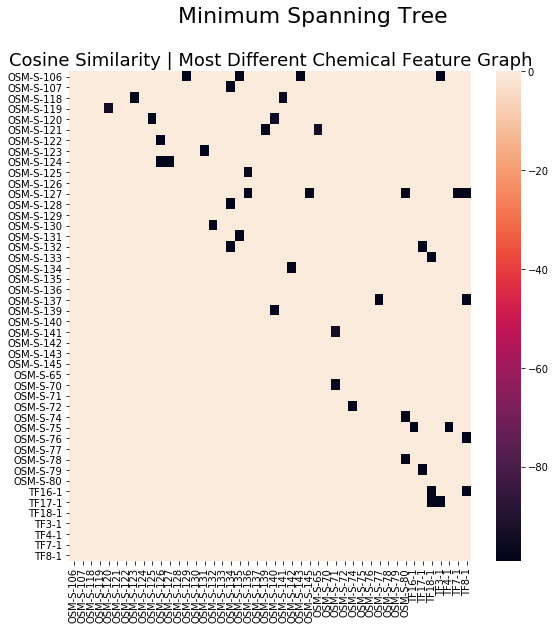

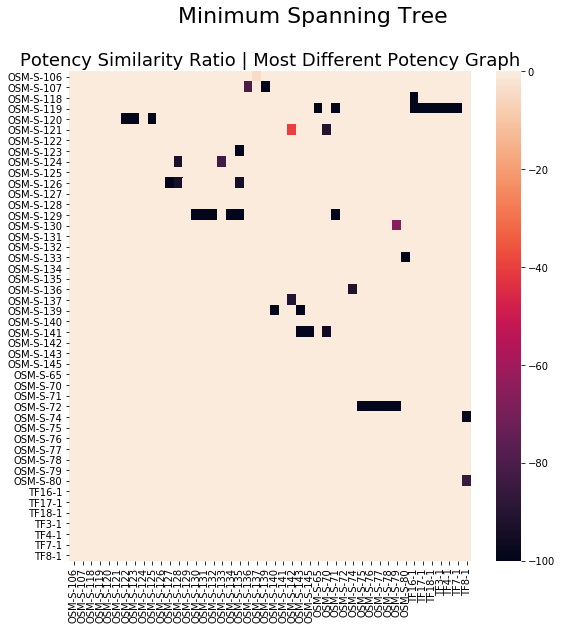

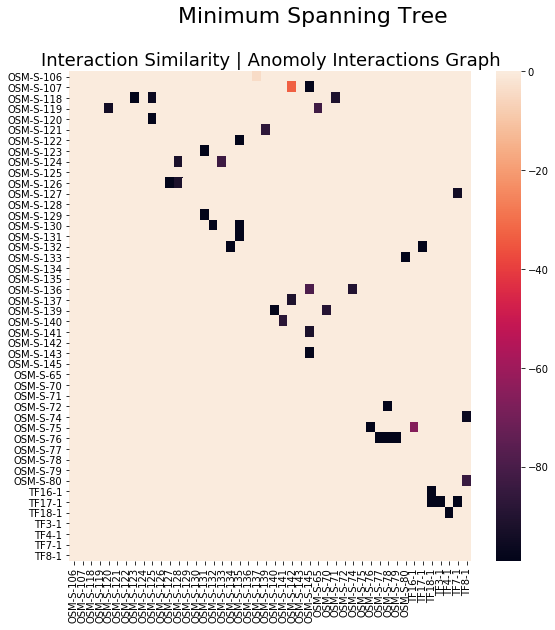

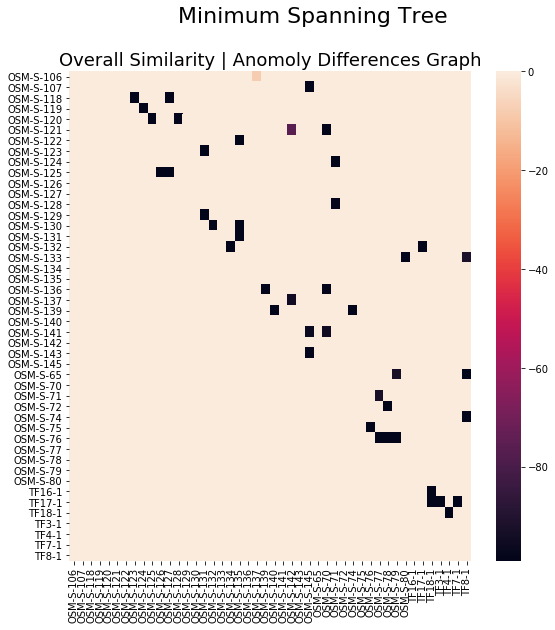

In [26]:
"""
Illustrative Example ...

>>> X = csr_matrix([[0, 8, 0, 3],
...                 [0, 0, 2, 5],
...                 [0, 0, 0, 6],
...                 [0, 0, 0, 0]])
>>> Tcsr = minimum_spanning_tree(X)
>>> Tcsr.toarray().astype(int)
array([[0, 0, 0, 3],
       [0, 0, 2, 5],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

input graph             minimum spanning tree

     (0)                         (0)
    /   \                       /
   3     8                     3
  /       \                   /
(3)---5---(1)               (3)---5---(1)
  \       /                           /
   6     2                           2
    \   /                           /
     (2)                         (2)
"""

def create_min_spanning_tree(someSimilarityMatrix, sim=1):
    
    # Min Spanning Tree on Distance <--> Max Spanning Tree on Similarity, I.e., 1 - distance = similarity.
    # The functions require integers, I.e., multiply by 100.
    # Remove lower triangle.
    M = (sim - np.matrix(someSimilarityMatrix)) * 100
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if j <= i:
                M[i,j]=0


    X = csr_matrix(M)
    Tcsr = minimum_spanning_tree(X)
    Tcsr = Tcsr.toarray().astype(int)
    return Tcsr

CS  = create_min_spanning_tree(cosine_similarity_matrix, sim=0)
PSR = create_min_spanning_tree(ic50_sim_ratio_matrix, sim=0)
IM  = create_min_spanning_tree(interaction_matrix, sim=0)
OS  = create_min_spanning_tree(overall_sim_matrix, sim=0)

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(CS,
            xticklabels=ic50_sim_ratio_matrix.index.tolist(),
            yticklabels=ic50_sim_ratio_matrix.index.tolist())
#ax.xaxis.tick_top()
plt.xticks(rotation=90)
#ax.set_ylabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
#ax.set_xlabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
plt.suptitle("Minimum Spanning Tree", size=22)
plt.title("Cosine Similarity | Most Different Chemical Feature Graph", size=18)
plt.show()

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(PSR,
            xticklabels=ic50_sim_ratio_matrix.index.tolist(),
            yticklabels=ic50_sim_ratio_matrix.index.tolist())
#ax.xaxis.tick_top()
plt.xticks(rotation=90)
#ax.set_ylabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
#ax.set_xlabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
plt.suptitle("Minimum Spanning Tree", size=22)
plt.title("Potency Similarity Ratio | Most Different Potency Graph", size=18)
plt.show()

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(IM,
            xticklabels=ic50_sim_ratio_matrix.index.tolist(),
            yticklabels=ic50_sim_ratio_matrix.index.tolist())
#ax.xaxis.tick_top()
plt.xticks(rotation=90)
#ax.set_ylabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
#ax.set_xlabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
plt.suptitle("Minimum Spanning Tree", size=22)
plt.title("Interaction Similarity | Anomoly Interactions Graph", size=18)
plt.show()

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(OS,
            xticklabels=ic50_sim_ratio_matrix.index.tolist(),
            yticklabels=ic50_sim_ratio_matrix.index.tolist())
#ax.xaxis.tick_top()
plt.xticks(rotation=90)
#ax.set_ylabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
#ax.set_xlabel(cosine_similarity_matrix.index.tolist(), fontsize=10)
plt.suptitle("Minimum Spanning Tree", size=22)
plt.title("Overall Similarity | Anomoly Differences Graph", size=18)
plt.show()

# Analysis

We have been able to identify similarities accross chemical features and IC50. Along the way, we were able to verify that our calculation make sense and the untuitive elements exist throughout. Cumulatively, we were able to look at the overall similarity between these compounds, identifying some odd combinations. For the current experiment, we can justify that these odd interactions are due to some uniqueness in one of the two IC50 different or chemical feature makeup. Hence, by looking into these very unsimilar overall combinations, we can dive into why these compounds, when looked at side by side, are not behaving consistently like most of the combinations.

The entire analysis can be done on the transpose of this problem to identify odd chemical features w.r.t other chemical features.